# Salary Prediction for a job

![title](1_P6vsNdGLGI8viUJK-se3SQ.png)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
%matplotlib inline

### Loading Data

In [3]:
#read data

def data_load(filename):
    '''Read data from csv using pd.read_csv()'''
    
    df = pd.read_csv(str(filename))
    return df

In [4]:
train_df = data_load('train_features.csv')
test_df = data_load('test_features.csv')
target_df = data_load('train_salaries.csv')

In [5]:
train_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
test_df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [7]:
target_df.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


#### Examine data types and records count

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


#### Seperating Numerical and Categorical Features

In [12]:
num_feature = ['yearsExperience','milesFromMetropolis']
cat_feature = ['jobId','companyId','jobType','degree','major','industry']

In [13]:
train_df.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
yearsExperience,1000000.0,11.992386,7.212391,0.0,6.0,12.0,18.0,24.0
milesFromMetropolis,1000000.0,49.529260,28.877733,0.0,25.0,50.0,75.0,99.0


In [14]:
train_df.describe(include=['O']).transpose()

,count,unique,top,freq
jobId,1000000,1000000,JOB1362684805521,1
companyId,1000000,63,COMP39,16193
jobType,1000000,8,SENIOR,125886
degree,1000000,5,HIGH_SCHOOL,236976
major,1000000,9,NONE,532355
industry,1000000,7,WEB,143206


#### Check for duplicate records

In [15]:
train_df.duplicated().sum()

0

In [16]:
test_df.duplicated().sum()

0

In [17]:
target_df.duplicated().sum()

0

#### Merge train data and salary values

In [18]:
def data_merge(df1,df2,colname):
    df = pd.merge(df1,df2,on = str(colname))
    return df

In [19]:
df = data_merge(train_df,target_df,'jobId')

In [20]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


#### Examine the target variable

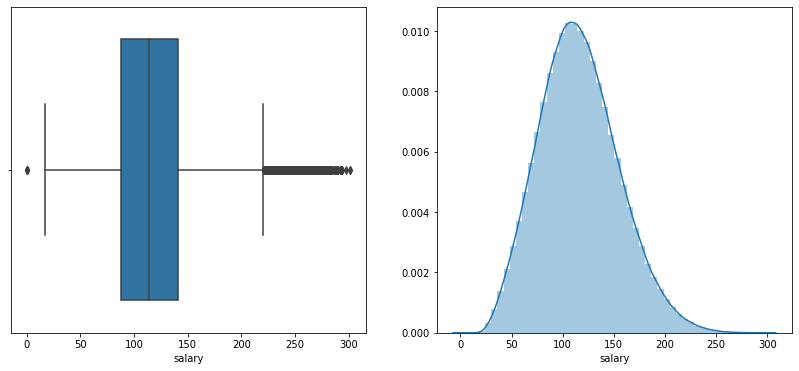

In [22]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot((df.salary))
plt.subplot(1,2,2)
sns.distplot(df.salary)
plt.show()

### Defining Outliers

In [23]:
summ = df.salary.describe()
print(summ)

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64


In [24]:
IQR = summ['75%'] - summ['25%']
upper = summ['75%'] + 1.5 * IQR
lower = summ['25%'] - 1.5 * IQR
print('the lower and upper bounds for outliers are {} and {} respectively'.format(lower,upper))


the lower and upper bounds for outliers are 8.5 and 220.5 respectively


#### Examining Outliers and Treating them

In [25]:
#For lower bound
df[(df.salary < 8.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [26]:
#For Upper Bound
df[df.salary > 220.5].groupby('jobType')['jobType'].count()

jobType
CEO               3227
CFO               1496
CTO               1488
JUNIOR              20
MANAGER            217
SENIOR              66
VICE_PRESIDENT     603
Name: jobType, dtype: int64

In [27]:
df.loc[df.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [28]:
df.loc[df.salary > 220.5, "jobType"].value_counts()

CEO               3227
CFO               1496
CTO               1488
VICE_PRESIDENT     603
MANAGER            217
SENIOR              66
JUNIOR              20
Name: jobType, dtype: int64

In [29]:
df.loc[(df.jobType == 'JUNIOR') & (df.salary > 220.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
189582,JOB1362684597269,COMP32,JUNIOR,DOCTORAL,BUSINESS,OIL,24,11,221
214606,JOB1362684622293,COMP47,JUNIOR,MASTERS,BUSINESS,FINANCE,22,4,222
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
427593,JOB1362684835280,COMP54,JUNIOR,DOCTORAL,ENGINEERING,FINANCE,23,3,221


In [30]:
# Remove data with zero salaries
df = df[df.salary > 8.5]

In [31]:
df.groupby('jobType')['jobType'].count()

jobType
CEO               124778
CFO               124369
CTO               125045
JANITOR           124971
JUNIOR            124592
MANAGER           125120
SENIOR            125886
VICE_PRESIDENT    125234
Name: jobType, dtype: int64

In [32]:
def plot_feature(df,col):
    '''
    To plot features and salary realtionship
    On right dependence between salary and feature
    On left frequency distribution of feature
    '''
    #Frequency Distribution Plot
    
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    
    if df[col].dtype== 'int64':
        df[col].value_counts().sort_index().plot()
        
    else:
        mean = df.groupby(col)['salary'].mean() #Computing salary mean for each label 
        df[col] = df[col].astype('category') #converting the column type to categorical
        levels = mean.sort_values().index.tolist() #storing mean values to levels
        df[col].cat.reorder_categories(levels,inplace =True) #reodering the col. categorical values as per level
        df[col].value_counts().plot() #Plotting the values of count of rows as per labels in column
    plt.ylabel('Frequency')
    
    #Feature relation with Salary Plot
    
    plt.subplot(1,2,2)
    if df[col].dtype == 'int64' or col == 'companyId' or col == 'jobId':
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(mean.index)), mean.values-std.values, mean.values + std.values, \
                         alpha = 0.1)
        
    else:
        sns.boxplot(x = col, y = 'salary', data=df)
    
    plt.xticks()
    plt.ylabel('Salaries')
    plt.show()
        

jobId


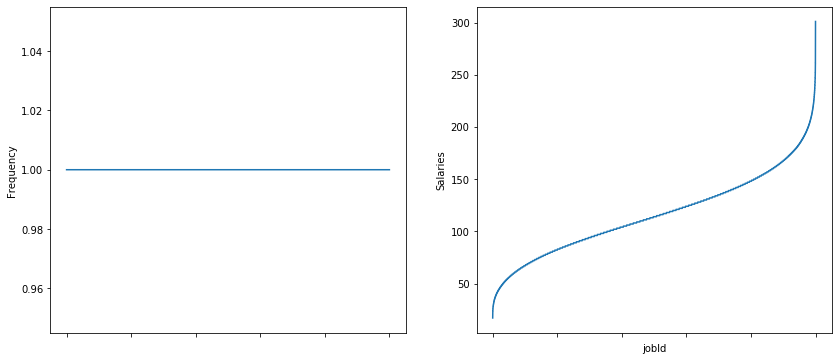

companyId


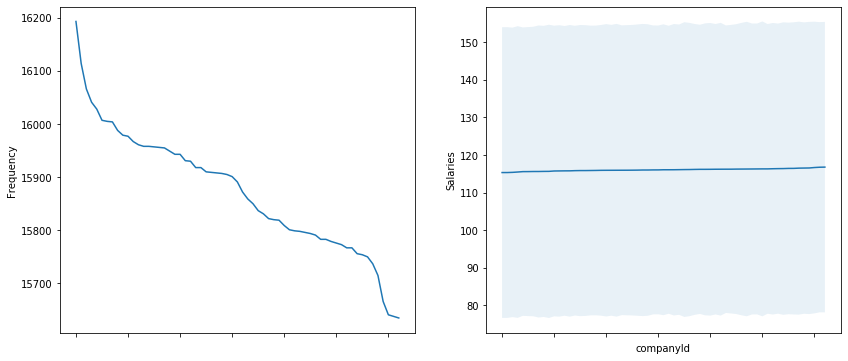

jobType


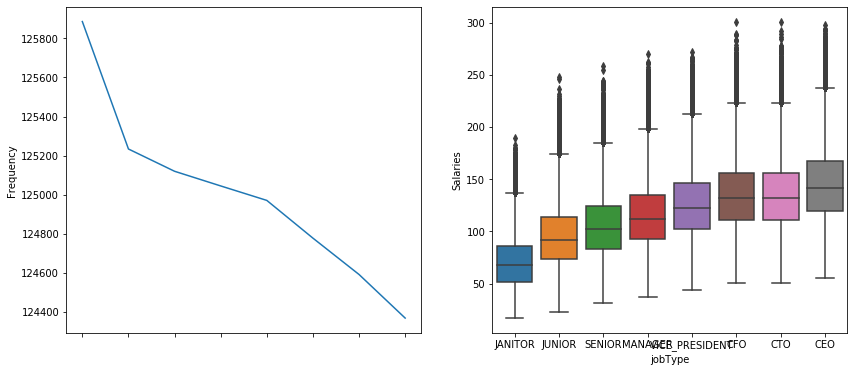

degree


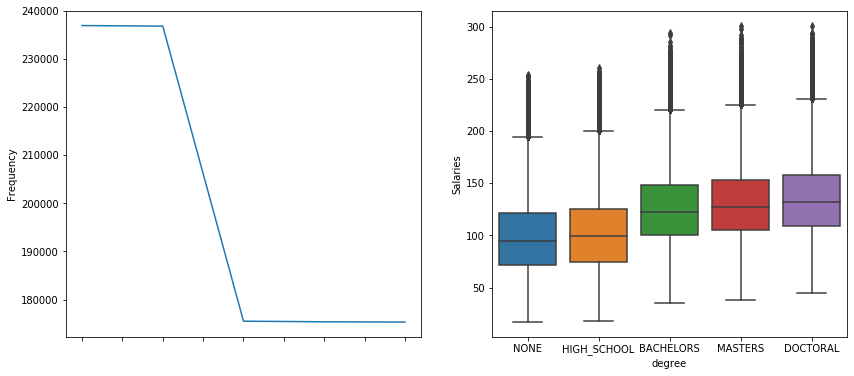

major


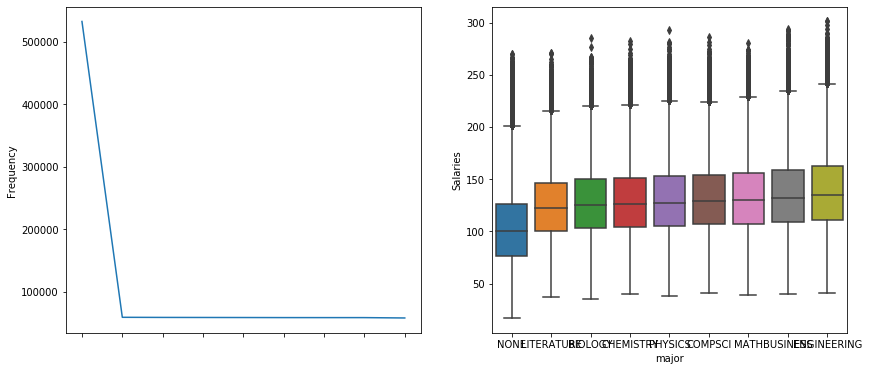

industry


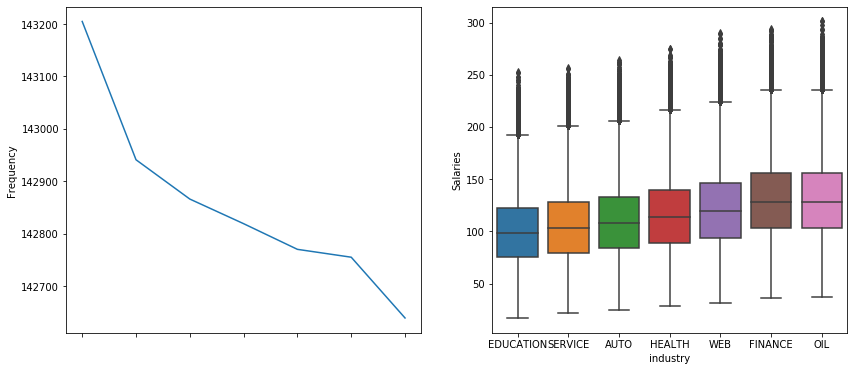

yearsExperience


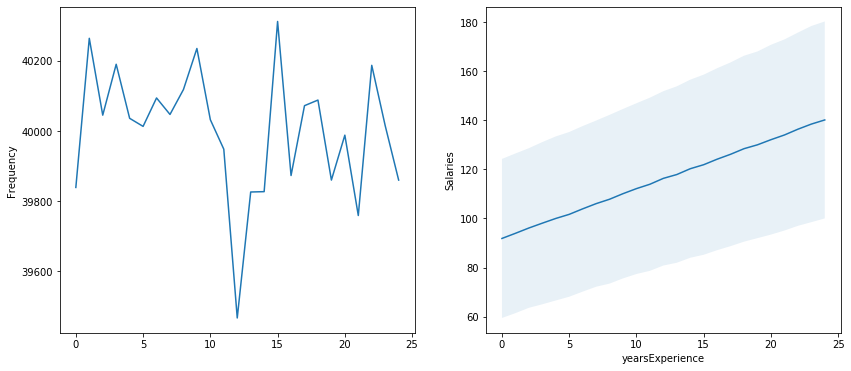

milesFromMetropolis


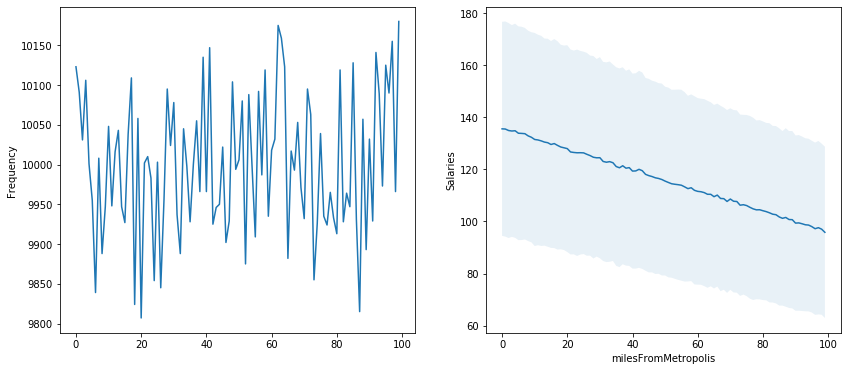

In [33]:
col_list = df.columns.tolist()
col_list.pop(-1)

for i in col_list:
    print(i)
    plot_feature(df,i)

In [34]:
df_copy = df.set_index('jobId').copy()

In [35]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
CategoricalIndex: 999995 entries, JOB1362684407687 to JOB1362685407686
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   companyId            999995 non-null  category
 1   jobType              999995 non-null  category
 2   degree               999995 non-null  category
 3   major                999995 non-null  category
 4   industry             999995 non-null  category
 5   yearsExperience      999995 non-null  int64   
 6   milesFromMetropolis  999995 non-null  int64   
 7   salary               999995 non-null  int64   
dtypes: category(5), int64(3)
memory usage: 79.1 MB


In [36]:
def encode_label(df):
    '''
    Reads columns of the data frame
    Encode categorical column values by mean salary for that label
    '''
    for col in df.columns:
        if (col != 'jobId' and df[col].dtype.name == 'category') :
            print(col,df[col].dtype.name)
            cat_dict = {}
            cats = df[col].cat.categories.tolist()
            for cat in cats:
                cat_dict[cat] = df[df[col] == cat]['salary'].mean()   
            df[col] = df[col].map(cat_dict) 
        else:
            continue


In [37]:
encode_label(df_copy)

companyId category
jobType category
degree category
major category
industry category


### Correlation Plot 

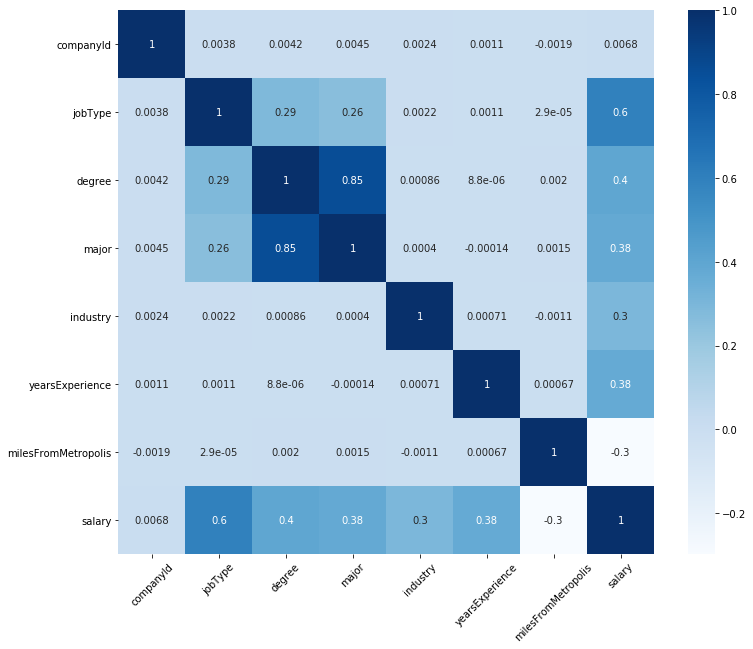

In [38]:
# Correlations between selected features and response
# jobId is discarded because it is unique for individual
fig = plt.figure(figsize=(12, 10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry', 'yearsExperience', 'milesFromMetropolis']
sns.heatmap(df_copy[features + ['salary']].astype('int64').corr(), cmap='Blues', annot=True)
plt.xticks(rotation=45)
plt.show()

In [39]:
df.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [42]:
df[cat_feature].describe().transpose()

,jobId,companyId,jobType,degree,major,industry
count,999995,999995,999995,999995,999995,999995
unique,999995,63,8,5,9,7
top,JOB1362684808298,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236975,532353,143205
